In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [30]:
dataframe=pd.read_csv("./sample_data/california_housing_train.csv")
dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


(array([1833., 6100., 5020., 2466.,  891.,  368.,  152.,   79.,   42.,
          49.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <BarContainer object of 10 artists>)

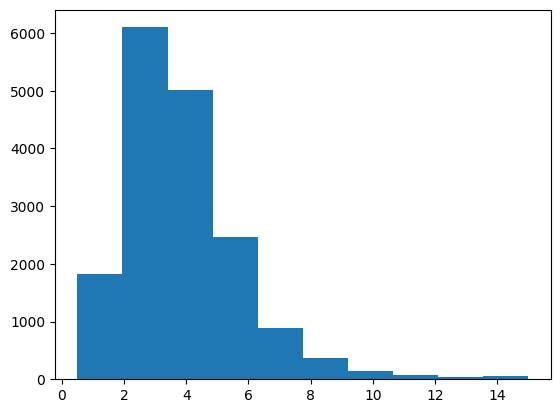

In [25]:
x=dataframe["housing_median_age"]
y=dataframe["median_income"]
plt.hist(y)

In [54]:

#NORMALIZACION Z-TRANSFORM
df1=dataframe.copy()


#Normalizacion SD
#median_income_nrm=(df1.median_income -df1.median_income.mean())/(df1.median_income.std())


##Normalizacion de 0 a 1
median_income_nrm=(df1.median_income-df1.median_income.min())/(df1.median_income.max()-df1.median_income.min())
df1["median_income"]=median_income_nrm


In [59]:
df1.sort_values("median_income",inplace=True)
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4502,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.0,162500.0
11130,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.0,82500.0
4689,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.0,500001.0
15369,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.0,67500.0
10260,-119.99,36.09,23.0,333.0,92.0,198.0,55.0,0.0,100000.0
...,...,...,...,...,...,...,...,...,...
1625,-117.23,32.99,17.0,2718.0,326.0,1011.0,319.0,1.0,500001.0
14791,-122.20,37.44,31.0,2328.0,270.0,722.0,247.0,1.0,500001.0
8050,-118.42,34.08,48.0,2413.0,261.0,770.0,248.0,1.0,500001.0
4461,-118.04,34.13,35.0,249.0,31.0,268.0,29.0,1.0,500001.0


(array([1833., 6100., 5020., 2466.,  891.,  368.,  152.,   79.,   42.,
          49.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

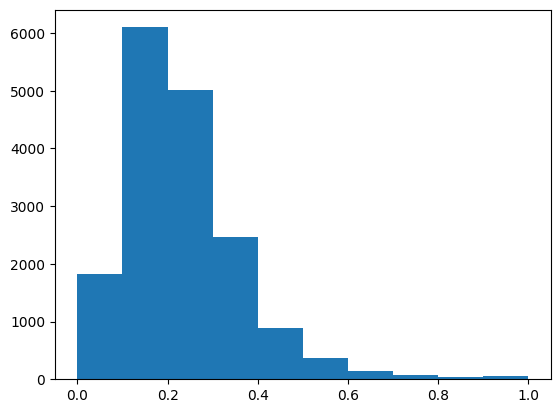

In [61]:
x=df1["median_house_value"]
y=df1["median_income"]
plt.hist(y)


In [64]:
minmax_normalizer=preprocessing.MinMaxScaler()
##Normalizado de rangos de 0 a 1
df3=dataframe.copy()
#Redimensionar nuestro arreglo con numpy
median_house_value=df3.median_house_value.to_numpy().reshape(-1,1)
median_house_value_normed=minmax_normalizer.fit_transform(median_house_value)
median_house_value_normed
df3.median_house_value=median_house_value_normed
df3.sort_values("median_house_value",inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,0.000000
16643,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,0.000000
16801,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,0.000000
3226,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,0.000000
7182,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,0.005157
...,...,...,...,...,...,...,...,...,...
15834,-122.42,37.81,52.0,1314.0,317.0,473.0,250.0,4.3472,1.000000
7927,-118.40,33.87,38.0,2398.0,431.0,911.0,392.0,5.2319,1.000000
3546,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,1.000000
7924,-118.40,33.88,35.0,1060.0,191.0,444.0,196.0,8.0015,1.000000


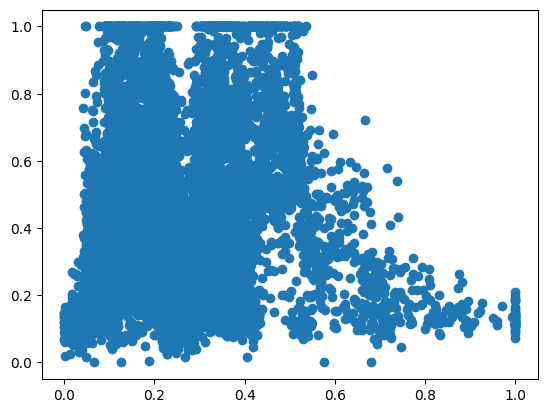

In [69]:
x=df3["median_house_value"]
y=df1["median_income"]
plt.scatter(y,x)

minmax_normalizer=preprocessing.MinMaxScaler(feature_range=(-1,1))
df4=dataframe.copy()
median_hosue_value=df4.median_house_value.to_numpy().reshape(-1,1)
median_house_value_normed2=minmax_normalizer(median_house_value)
df4.median_house_value=median_house_value_normed2
df4.sort_values("median_house_Value",inplace=True)


In [66]:


##lista=["append",2,"hola"]
lista_numeros=[1,10,11]
palabra="Hola"
lista_2d=[["Jueves","Viernes","Sabado"],["Martes","Lunes","Domingo"]]
nombres=["Juna", "Ana","Guillermo","Lorenzo","Ana","Guillermo"] 



def buscar_numero(numero):
    for n in lista_numeros:
        if(n==numero):
            return True
    return False

def buscar_palabra(palabra):
    for n in nombres:
        if(n.lower()==palabra.lower()):
            return True
    return False


def eliminar_duplicas(lista_i,list_size):
    for n in range(0,list_size):
        elemento=lista_i[n]
        for x in range(n-1,list_size):
            if(elemento==lista_i[x]):
                print(elemento)
                



nombres.remove("Ana")
nombres.pop(0)
lista_numeros.pop(0)
lista_numeros.remove(11)

print(nombres)
print(lista_numeros)


['Guillermo', 'Lorenzo', 'Ana', 'Guillermo']
[10]


In [67]:
##Para Remover duplicas.
nombres=["Juna", "Ana","Guillermo","Lorenzo","Ana","Guillermo"] 
eliminar_duplicas(nombres,len(nombres))
nombres=list(set(nombres))
print(nombres)

Juna
Ana
Ana
Guillermo
Guillermo
Lorenzo
Ana
Guillermo
['Ana', 'Lorenzo', 'Guillermo', 'Juna']


In [15]:
numero=22
if buscar_numero(numero):
    print("contiene el numero")

In [33]:
valores=[3,2,7,9,1,5,8]
print(valores)


valores.sort()

print(valores)

[3, 2, 7, 9, 1, 5, 8]
[1, 2, 3, 5, 7, 8, 9]


In [34]:
nombres=["Juna", "Ana","Guillermo"] #3
nombres.sort()

print(nombres)

['Ana', 'Guillermo', 'Juna']


In [42]:
print(buscar_palabra("POllo"))


False
